In [1]:
from LIMxCMBL.init import *
from LIMxCMBL.noise import *
from scipy.signal.windows import dpss
import sys

n_external = 1201

zmin = 2.4
zmax = 3.4

chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

# get CMB lensing component
from LIMxCMBL.kernels import get_f_Kkappa
f_WkD = get_f_Kkappa()

from LIMxCMBL.cross_spectrum import *
ClKK = d_chib_integral(f_WkD, f_WkD) #[Mpc]^2


# beam=1.4, noise=7
from scipy.interpolate import interp1d
N0_ells = np.logspace(1, np.log10(5000), 500)
with open('LIMxCMBL/N0.npy', 'rb') as f:
    N0 = np.load(f)
    
f_N0 = interp1d(x = N0_ells, y = N0)


# if no high pass IKappa
from  LIMxCMBL.kernels import *
f_Kkappa = get_f_Kkappa()


f_KLIM   = interp1d(x=chis, y = KI_CO, bounds_error = False, fill_value=0)
f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)

In [2]:
oup_fname = '/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_%d_zmin_%.1f_zmax_%.1f.npy'%(n_external, zmin, zmax)
print(oup_fname)

/scratch/users/delon/LIMxCMBL/I_auto/I_auto_n_ext_1201_zmin_2.4_zmax_3.4.npy


In [3]:
external_chis = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_external)

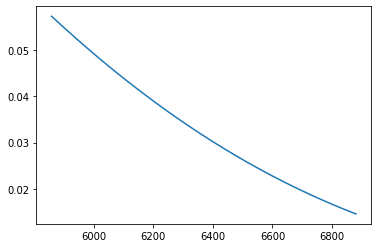

In [4]:
import matplotlib.pyplot as plt
plt.plot(external_chis, f_KLIM(external_chis))

In [5]:
from scipy.interpolate import LinearNDInterpolator


In [6]:
tmp_chibs = []
tmp_log_deltas = []
tmp_fnctn = []
for i in range(len(chibs)):
    for j in range(len(deltas)):
        tmp_chibs += [chibs[i]]
        tmp_log_deltas += [np.log10(deltas[j])]
        tmp_fnctn += [inner_dkparp_integral[:,i,j]]
        
new_f_inner_integral = LinearNDInterpolator(list(zip(tmp_chibs, tmp_log_deltas)), tmp_fnctn)

In [7]:
X, Y = np.meshgrid(chibs, np.log10(deltas))
new_f_inner_integral(X, Y).shape

(128, 256, 100)

In [8]:
def f_unfiltered_auto(chi, chip):
    ret = 4/(chi + chip)**2
    ret *= f_KLIM_windowed(chi) * f_KLIM_windowed(chip)
    _delta = np.abs((chi - chip) / (chi + chip))
    
    ### bound delta
    _delta = np.where(_delta > 0.7, 0.7, _delta)
    _delta = np.where(_delta < 1e-6, 1e-6, _delta)
    
    _chib  = (chi + chip) / 2
    X, Y = np.meshgrid(_chib, np.log10(_delta))
    return ret * new_f_inner_integral(X,Y)

In [9]:
from scipy.integrate import quad_vec

In [10]:
unfiltered_auto = np.zeros((100, n_external, n_external))
for i in trange(n_external):
    for j in range(i, n_external):
        unfiltered_auto[:, i, j] = unfiltered_auto[:, j, i] = f_unfiltered_auto(external_chis[i], 
                                                                                external_chis[j])

100%|██████████| 1201/1201 [01:41<00:00, 11.81it/s] 


In [11]:
import matplotlib.pyplot as plt

In [12]:
np.save(oup_fname, unfiltered_auto)

1.3634893957714706e-07 1.3634893957714706e-07


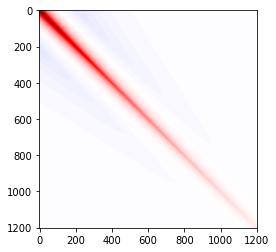

1.364662431178918e-07 1.364662431178918e-07


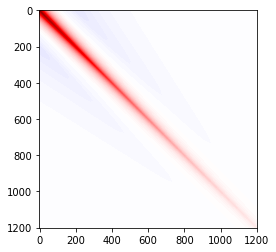

1.365915405055739e-07 1.365915405055739e-07


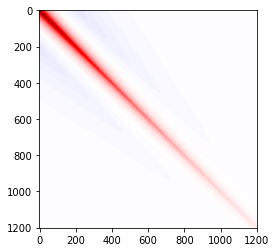

1.3672499934025957e-07 1.3672499934025957e-07


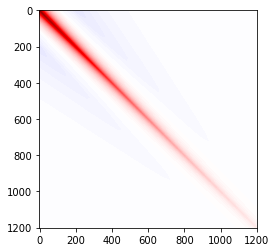

1.3686670989654693e-07 1.3686670989654693e-07


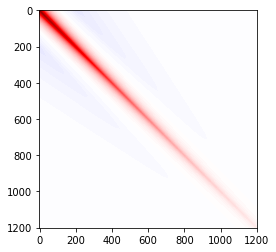

1.370166679327042e-07 1.370166679327042e-07


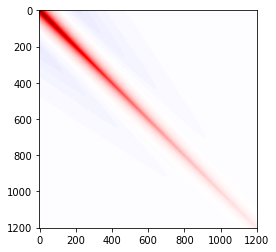

1.3717475282010398e-07 1.3717475282010398e-07


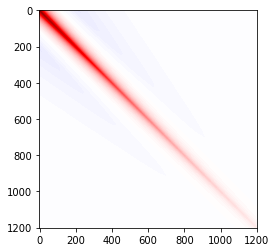

1.3734070160258354e-07 1.3734070160258354e-07


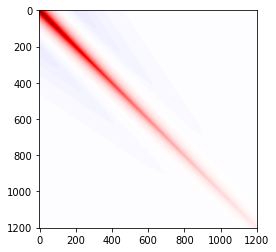

1.375140761720074e-07 1.375140761720074e-07


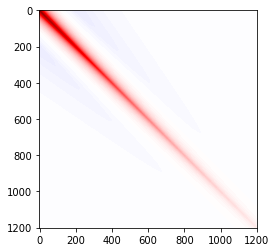

1.3769423384581397e-07 1.3769423384581397e-07


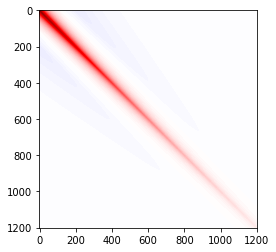

1.378802928423598e-07 1.378802928423598e-07


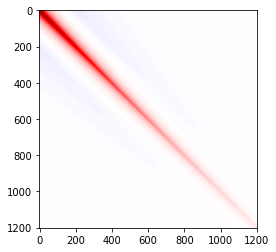

1.380710908258541e-07 1.380710908258541e-07


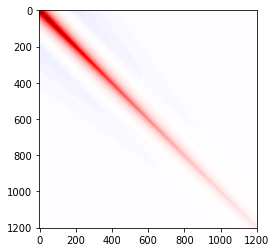

1.382651412359136e-07 1.382651412359136e-07


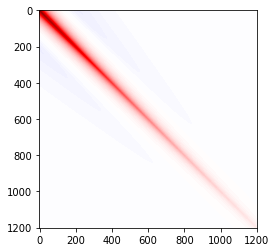

1.3846058423507725e-07 1.3846058423507725e-07


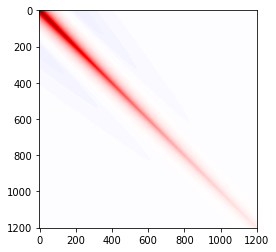

1.3865513414478906e-07 1.3865513414478906e-07


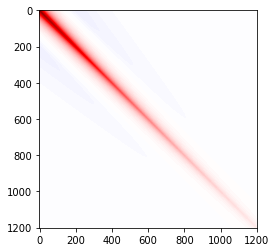

1.3884602404100564e-07 1.3884602404100564e-07


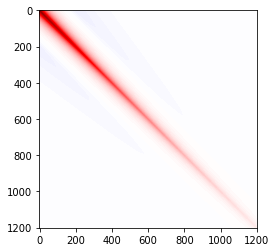

1.3902994566673426e-07 1.3902994566673426e-07


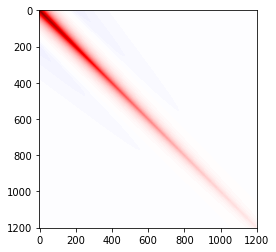

1.3920298705842152e-07 1.3920298705842152e-07


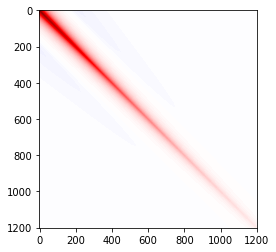

1.393605712831309e-07 1.393605712831309e-07


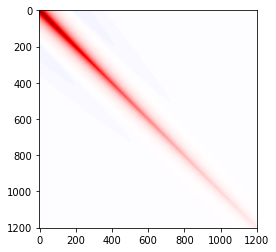

1.3949739156586535e-07 1.3949739156586535e-07


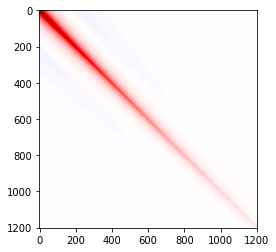

1.3960735302252117e-07 1.3960735302252117e-07


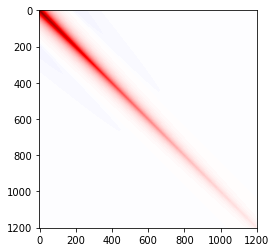

1.3968351870936727e-07 1.3968351870936727e-07


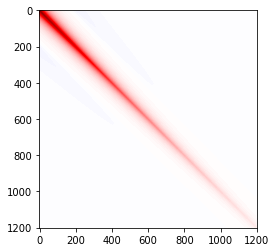

1.397180663790103e-07 1.397180663790103e-07


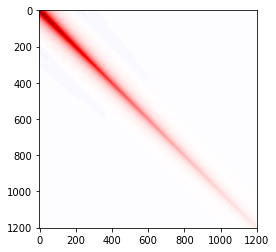

1.3970225931654116e-07 1.3970225931654116e-07


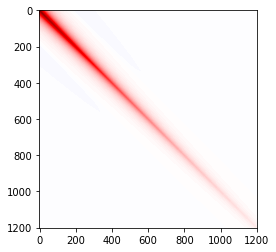

1.396264422503007e-07 1.396264422503007e-07


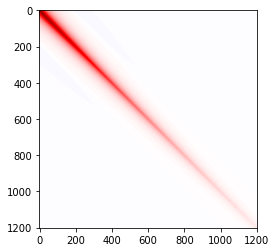

1.3948006370531014e-07 1.3948006370531014e-07


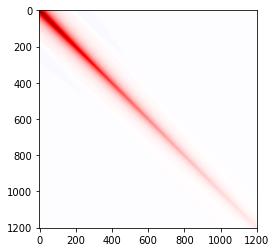

1.3925174167647182e-07 1.3925174167647182e-07


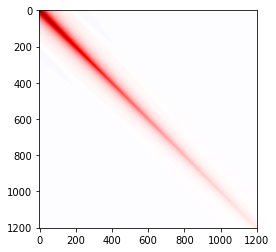

1.3892937584207097e-07 1.3892937584207097e-07


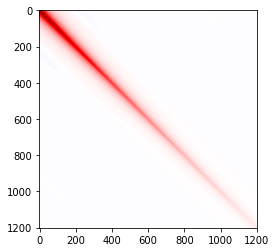

1.3850032915109597e-07 1.3850032915109597e-07


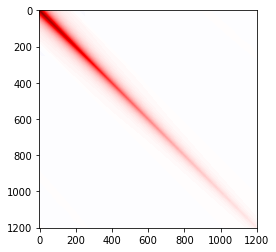

1.3795168179820623e-07 1.3795168179820623e-07


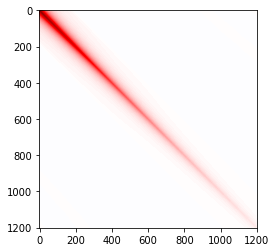

1.3727057212884032e-07 1.3727057212884032e-07


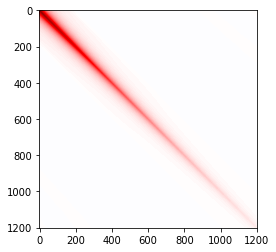

1.3644464583846588e-07 1.3644464583846588e-07


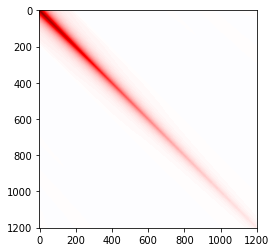

1.3546260152919252e-07 1.3546260152919252e-07


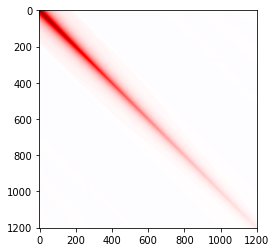

1.3431485236447398e-07 1.3431485236447398e-07


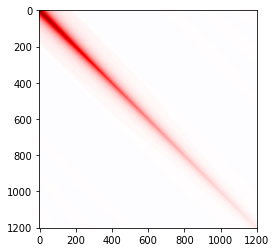

1.3299426871950128e-07 1.3299426871950128e-07


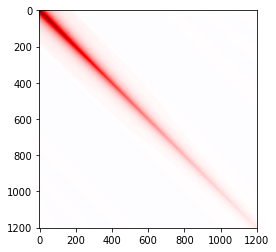

1.3149700534685858e-07 1.3149700534685858e-07


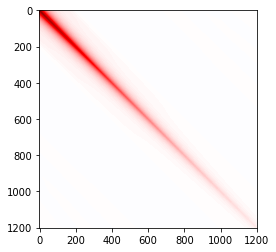

1.2982332655298655e-07 1.2982332655298655e-07


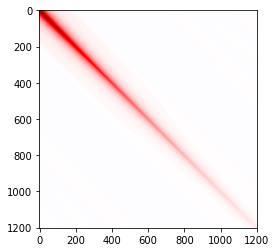

1.279783881704563e-07 1.279783881704563e-07


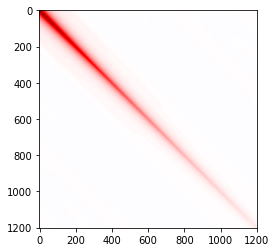

1.2597285243387728e-07 1.2597285243387728e-07


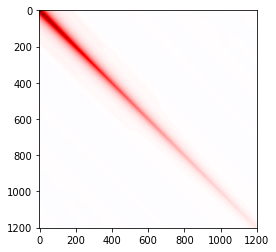

1.2382319051902673e-07 1.2382319051902673e-07


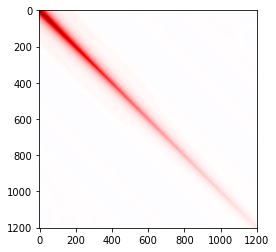

1.2155150988678e-07 1.2155150988678e-07


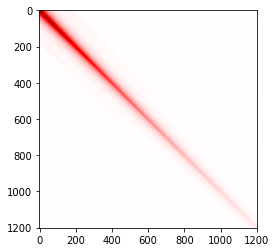

1.1918466857797828e-07 1.1918466857797828e-07


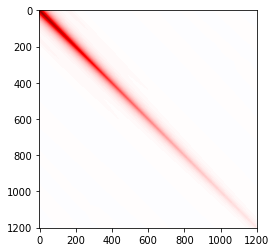

1.1675238204419423e-07 1.1675238204419423e-07


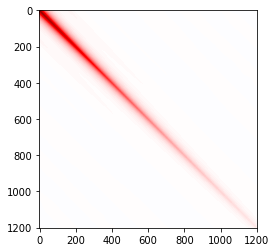

1.1428236355838624e-07 1.1428236355838624e-07


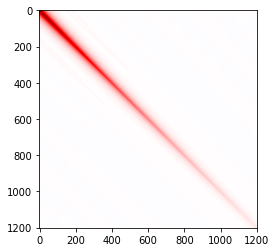

1.1180691762223863e-07 1.1180691762223863e-07


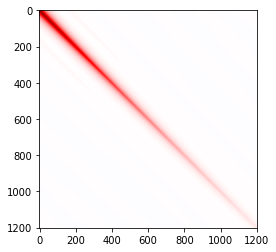

1.0935634582929858e-07 1.0935634582929858e-07


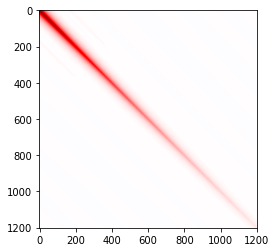

1.0694175320540571e-07 1.0694175320540571e-07


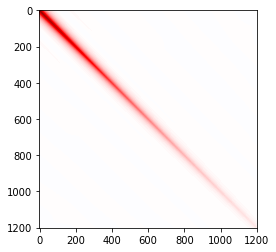

1.0455476076894824e-07 1.0455476076894824e-07


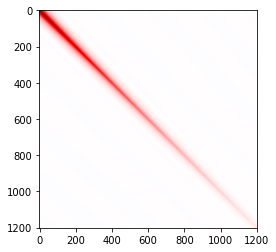

1.0216799723611852e-07 1.0216799723611852e-07


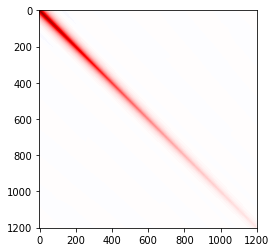

9.974040177789358e-08 9.974040177789358e-08


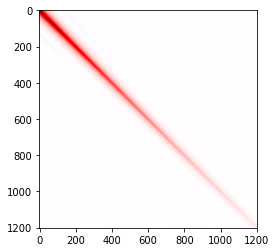

9.72280370785022e-08 9.72280370785022e-08


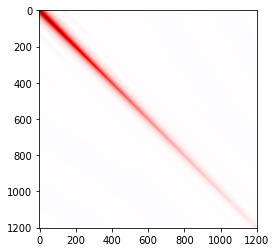

9.45516169352184e-08 9.45516169352184e-08


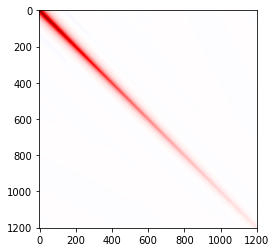

9.162406321721819e-08 9.162406321721819e-08


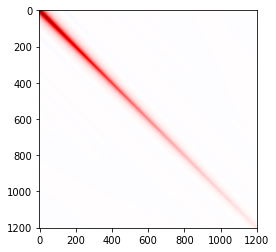

8.841242424500478e-08 8.841242424500478e-08


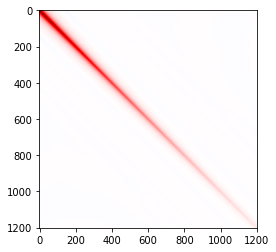

8.49224544518777e-08 8.49224544518777e-08


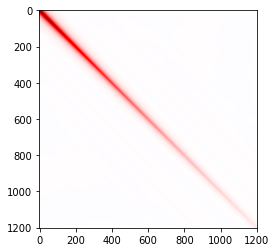

8.123267659087504e-08 8.123267659087504e-08


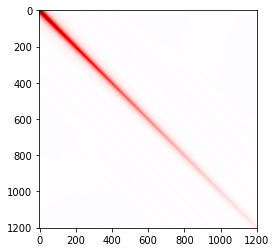

7.748563843635676e-08 7.748563843635676e-08


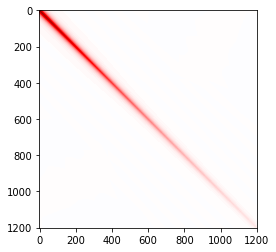

7.385341799018282e-08 7.385341799018282e-08


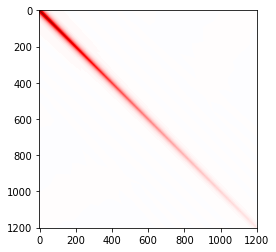

7.049330065510724e-08 7.049330065510724e-08


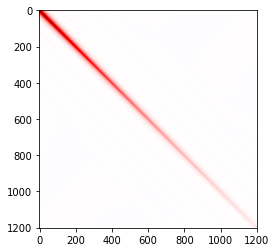

6.749213638147244e-08 6.749213638147244e-08


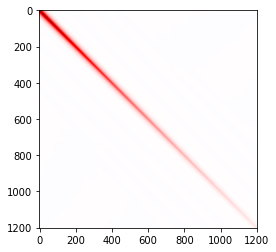

6.480821213248909e-08 6.480821213248909e-08


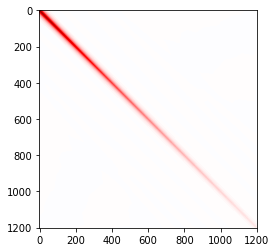

6.226737418933467e-08 6.226737418933467e-08


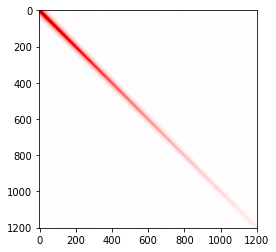

5.96289144765001e-08 5.96289144765001e-08


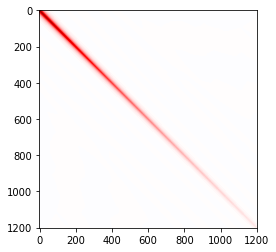

5.6694102015535296e-08 5.6694102015535296e-08


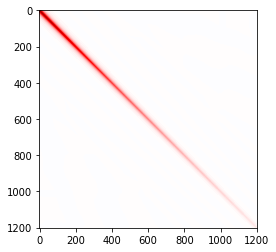

5.3479849493183426e-08 5.3479849493183426e-08


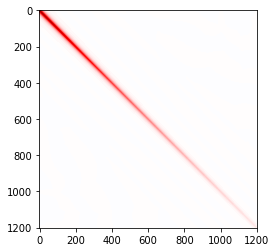

5.0264062903967245e-08 5.0264062903967245e-08


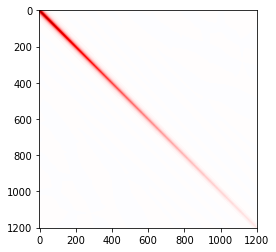

4.735874270077115e-08 4.735874270077115e-08


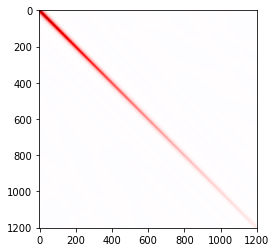

4.48948282299281e-08 4.48948282299281e-08


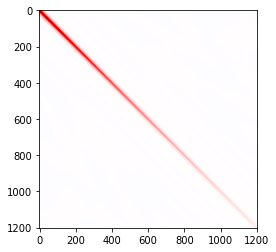

4.267462236318505e-08 4.267462236318505e-08


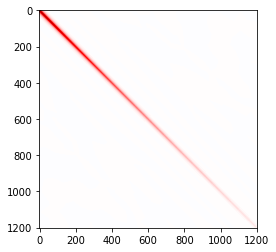

4.0354711418228225e-08 4.0354711418228225e-08


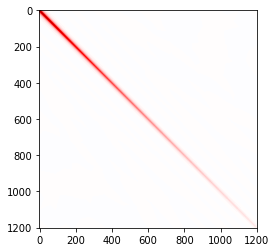

3.782121778911972e-08 3.782121778911972e-08


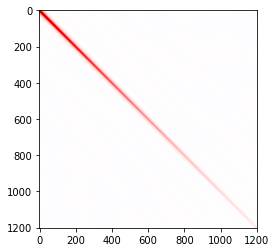

3.533158223446823e-08 3.533158223446823e-08


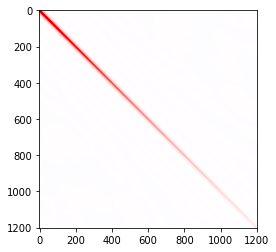

3.3173353426285324e-08 3.3173353426285324e-08


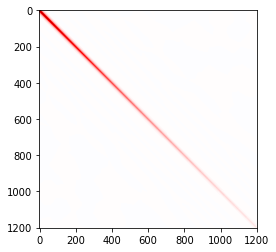

3.12526059788516e-08 3.12526059788516e-08


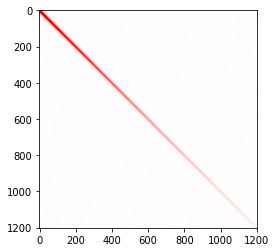

2.927939908013306e-08 2.927939908013306e-08


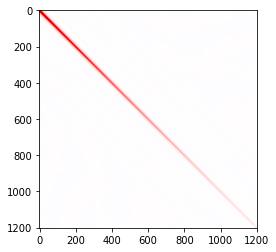

2.727302013022438e-08 2.727302013022438e-08


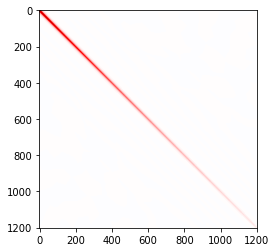

2.5469542857984384e-08 2.5469542857984384e-08


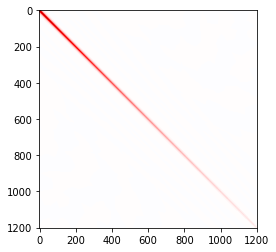

2.3824364046602455e-08 2.3824364046602455e-08


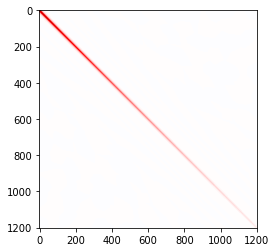

2.2176704061967202e-08 2.2176704061967202e-08


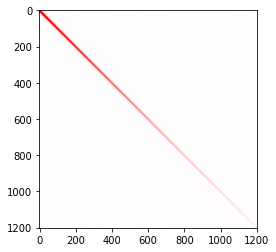

2.0622055141569823e-08 2.0622055141569823e-08


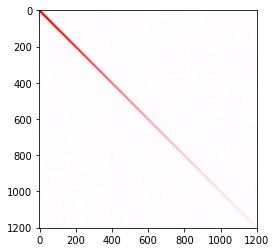

1.9201105906203e-08 1.9201105906203e-08


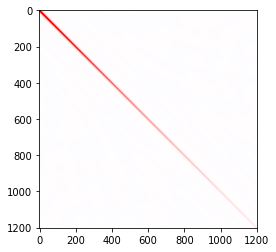

1.7824878076140192e-08 1.7824878076140192e-08


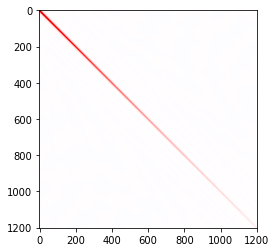

1.653950559848645e-08 1.653950559848645e-08


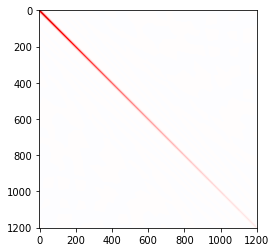

1.5337331853684667e-08 1.5337331853684667e-08


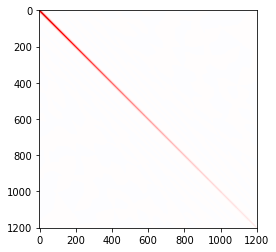

1.4200469265535365e-08 1.4200469265535365e-08


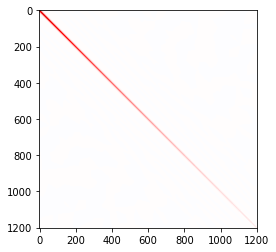

1.314213700459982e-08 1.314213700459982e-08


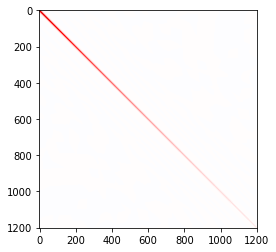

1.2147485646016738e-08 1.2147485646016738e-08


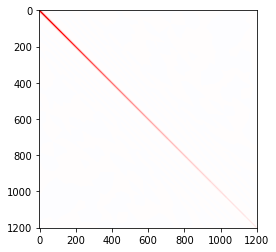

1.1220361483678036e-08 1.1220361483678036e-08


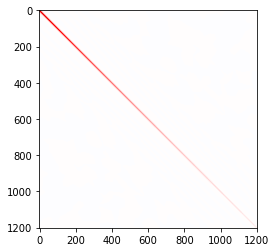

1.0353926555347721e-08 1.0353926555347721e-08


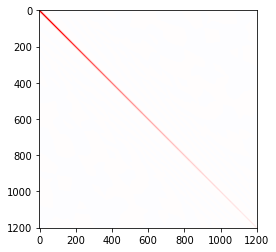

9.547043950076957e-09 9.547043950076957e-09


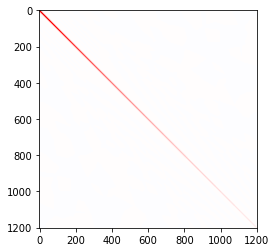

8.795202092775787e-09 8.795202092775787e-09


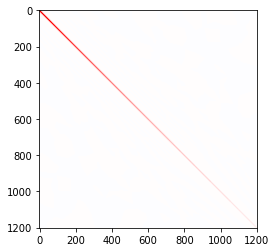

8.095913857541114e-09 8.095913857541114e-09


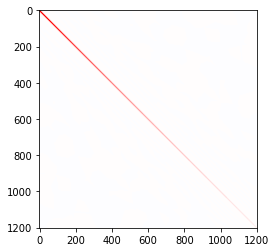

7.446537563826854e-09 7.446537563826854e-09


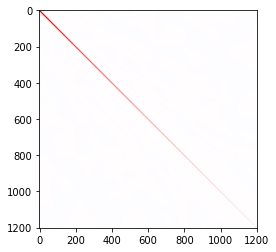

6.844211378138762e-09 6.844211378138762e-09


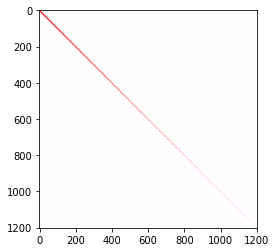

6.286012728387058e-09 6.286012728387058e-09


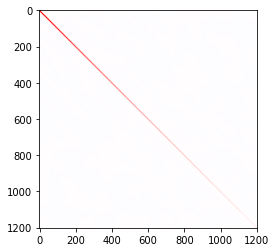

5.76916357194182e-09 5.76916357194182e-09


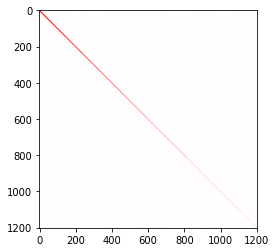

5.291049088245503e-09 5.291049088245503e-09


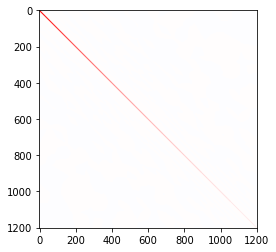

4.849210028894199e-09 4.849210028894199e-09


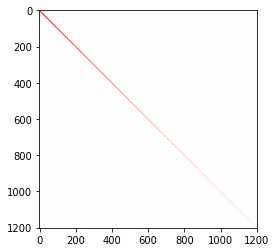

4.4412952747892965e-09 4.4412952747892965e-09


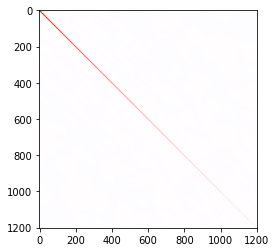

4.065051559977376e-09 4.065051559977376e-09


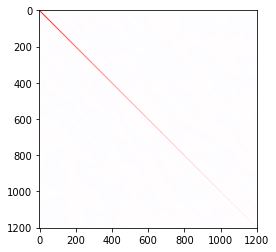

In [13]:
for ell_idx in range(len(ells)):
    vb = np.max(np.abs(unfiltered_auto[ell_idx]))
    plt.imshow(unfiltered_auto[ell_idx], vmin = -vb, vmax = vb, cmap = 'seismic')
    print(np.max(np.abs(unfiltered_auto[ell_idx])), vb)
    plt.show()